# **<center>Optimización Castillos</center>**

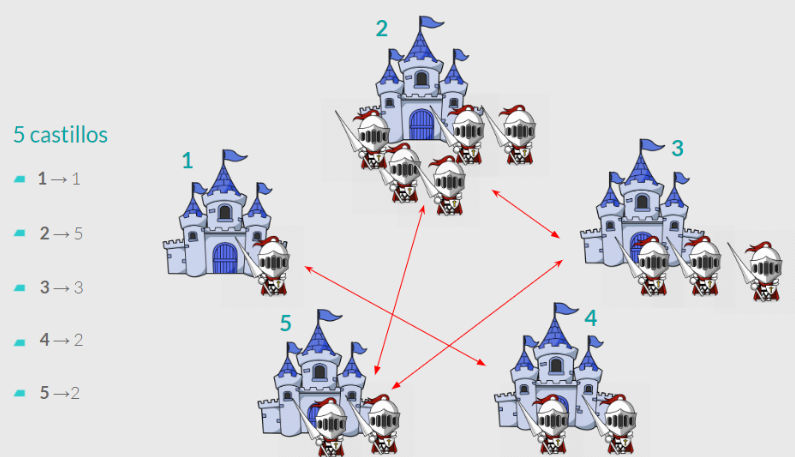

Tenemos una serie de castillos los cuales poseen un numero determinado de soldados, existe una série de restricciones por el cual determinados castillos no pueden agruparse entre ellos. La función QUBO que modela el problema es la mostrada a continuación: 

$$f(x_0, x_1, x_2,x_3,x_4) = x_0 + 5x_1 + 3x_2 + 2x_3 + 2x_4 - 3x_0 x_3 - 8 x_1 x_2 - 7 x_1 x_4 - 5 x_2 x_4$$

Sin embargo, el problema al que nos enfrentamos no es un problema de minimización, si no que es un problema de maximización por el cual buscamos obtener o reclutar el ejercito mas grande posible. Por lo tanto, para convertir este problema de minimización en un problema de maximización, basta con modificar la función cubo original a la mostrada a continuación:

$$g(x)= - f(x)= - x_0 - 5x_1 - 3x_2 - 2x_3 - 2x_4 + 3x_0 x_3 + 8 x_1 x_2 + 7 x_1 x_4 + 5 x_2 x_4 $$

**Librerias**

In [10]:
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx
import networkx as nx
import matplotlib.pyplot as plt
import dwave.inspector
from dwave.system import DWaveSampler, LazyFixedEmbeddingComposite,EmbeddingComposite

**Función QUBO**

In [2]:
# Implementamos la función g(x), que se dividen el su parte lienal, cuadratica y constante

linear = {0: -1, 1: -5, 2: -3, 3: -2, 4: -2}
quadratic = {(0, 3): 3, (1, 2): 8, (1, 4): 7, (2, 4): 5}
offset = 0.0
vartype = dimod.BINARY

In [3]:
# Construimos la función QUBO g(x)

bqm = dimod.BinaryQuadraticModel(linear, quadratic, offset, vartype)

# LLamamos al simulador 

sampler = dimod.SimulatedAnnealingSampler()

# Ejecutamos el problema en el simulador

sample_set = sampler.sample(bqm)

# Obtenemos de todos los resultados el nivel y estado de energia mas bajo encontrado

solution = sample_set.first.sample
energy = sample_set.first.energy
print(f"La solución óptima es {solution} con energía {abs(energy)}")

La solución óptima es {0: 0, 1: 1, 2: 0, 3: 1, 4: 0} con energía 7.0


In [13]:
# Realizamos la prueba en un cuantico real para comprobar como el grafo original se embebe en la topologia chimera de D-Wave

num_samples = 1000
sampler = EmbeddingComposite(DWaveSampler())
bqm = dimod.BinaryQuadraticModel(linear, quadratic, offset, vartype)
sampleset = sampler.sample(bqm, num_reads=num_samples)   

# Obtenemos de igual forma los resultados optimos

solution = sampleset.first.sample
energy = sampleset.first.energy
print(f"La solución óptima es {solution} con energía {abs(energy)}")

# La funcionalidad inspector nos permite visualizar como se embebe el grafo en la topologia de nuestra QPU

dwave.inspector.show(sampleset)       

La solución óptima es {0: 0, 1: 1, 2: 0, 3: 1, 4: 0} con energía 7.0


Serving Inspector on http://127.0.0.1:18000/?problemId=fe3a577a-5aae-4ee3-81fb-377fc70bb024

'http://127.0.0.1:18000/?problemId=fe3a577a-5aae-4ee3-81fb-377fc70bb024'